<a href="https://www.kaggle.com/code/itsmakni/deep-learning-for-skin-cancer-detection?scriptVersionId=167481245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This project implements a Convolutional Neural Network (CNN) to classify skin cancer images as benign or malignant. The model utilizes various data augmentation techniques to improve generalization and achieves an accuracy of [accuracy]% on the test set.

The code includes:

* Data preprocessing using ImageDataGenerator for image loading, resizing, and augmentation.
* A CNN architecture with convolutional, pooling, and dense layers.
* Training with Adam optimizer and early stopping to prevent overfitting.
* Model evaluation with plots visualizing training and validation performance.
* Saving the model in both .h5 and TFLite formats for deployment.




In [1]:
#import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
import keras
from keras.applications import VGG19,Xception,VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras import layers
import tensorflow as tf


2024-03-17 16:26:36.716538: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 16:26:36.716645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 16:26:36.859326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#import  train test data 
## loading training set
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)

train_data = train_datagen.flow_from_directory(
    '../input/skin-cancer-malignant-vs-benign/train',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)


## loading validation dataset
test_datagen =  ImageDataGenerator(rescale=1/255)
test_data =   test_datagen.flow_from_directory(
    '../input/skin-cancer-malignant-vs-benign/test',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)



Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [3]:
#display classes names
class_names = ["Benign","Malignant"]
for i in class_names :
    print(class_names.index(i),"  ",i)

0    Benign
1    Malignant


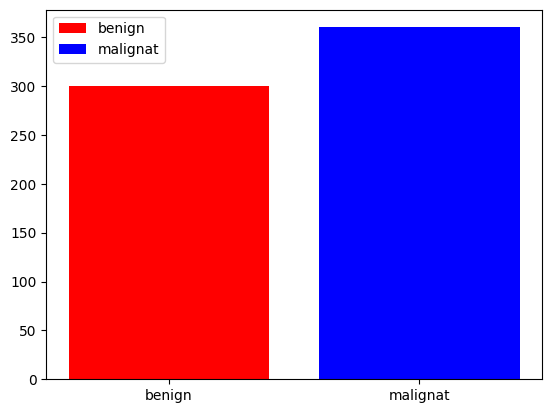

In [4]:
#visulaize test_data
fig, ax = plt.subplots()
ax.bar(["benign"],[300],color= "r",label='benign')
ax.bar(["malignat"],[360],color ="b",label ="malignat")
ax.legend()

benign


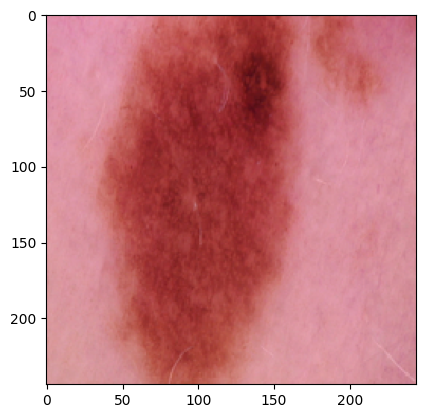

In [5]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1003.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("benign")
plt.imshow(new_img)

malignant


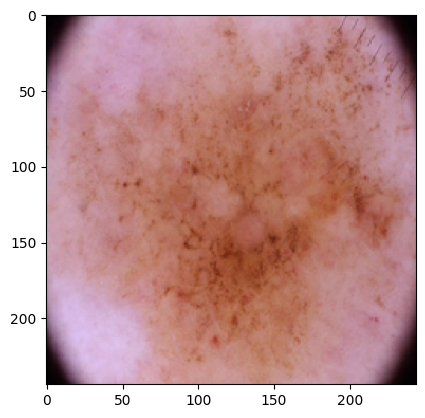

In [6]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/malignant/1080.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("malignant")
plt.imshow(new_img)

In [7]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(2, activation= 'softmax')
])

In [8]:
#compile the model
import tensorflow as tf
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [9]:
#fit the model
histroy=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 20)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 354ms/step - accuracy: 0.6261 - loss: 0.6930 - val_accuracy: 0.5955 - val_loss: 0.5938
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 194ms/step - accuracy: 0.7679 - loss: 0.4704 - val_accuracy: 0.8030 - val_loss: 0.5024
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.7786 - loss: 0.4574 - val_accuracy: 0.7970 - val_loss: 0.4635
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step - accuracy: 0.7833 - loss: 0.4621 - val_accuracy: 0.8152 - val_loss: 0.4422
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - accuracy: 0.7845 - loss: 0.4639 - val_accuracy: 0.8167 - val_loss: 0.4051
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.7805 - loss: 0.4310 - val_accuracy: 0.8091 - val_loss: 0.4141
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.7965 - loss: 0.4203 - val_accuracy: 0.7924 - val_loss: 0.4070
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - accuracy: 0.8023 - loss: 0.4052 - val_accuracy: 0.789

In [10]:
#evulate model
model.evaluate(test_data)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.8110 - loss: 0.3788


[0.3719944953918457, 0.821212112903595]

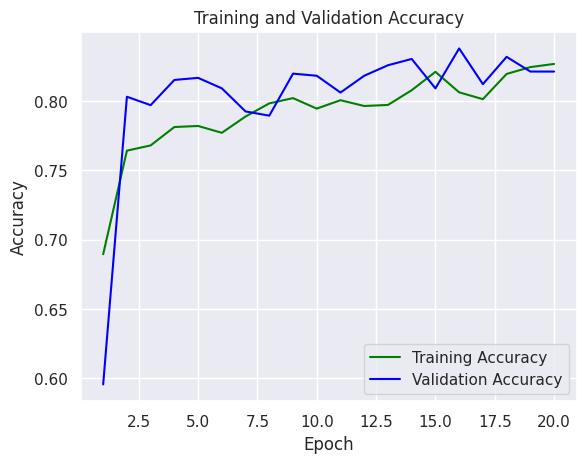

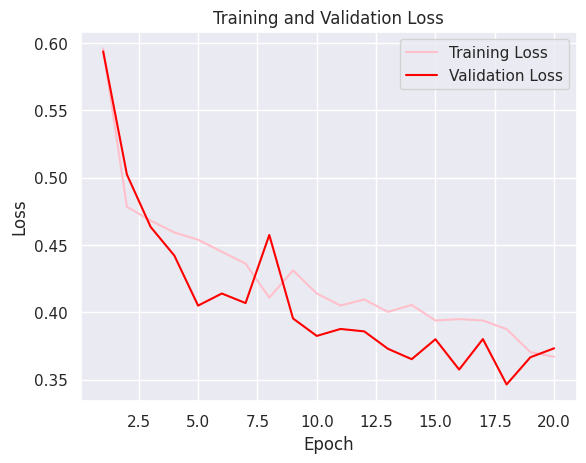

In [11]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
#predict val data
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
[1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0
 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[1]
Malignant


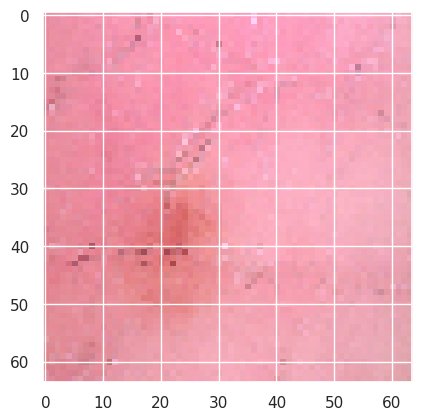

In [13]:
#example 1
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1006.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[1]
Malignant


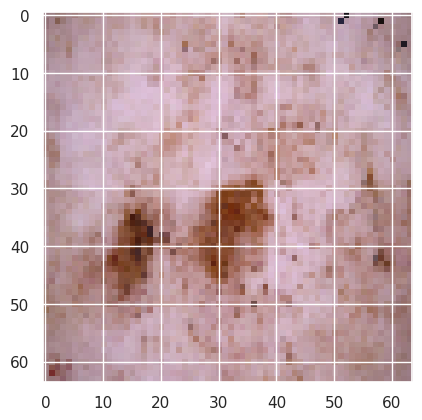

In [14]:
#example 2
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/train/malignant/1006.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0]
Benign


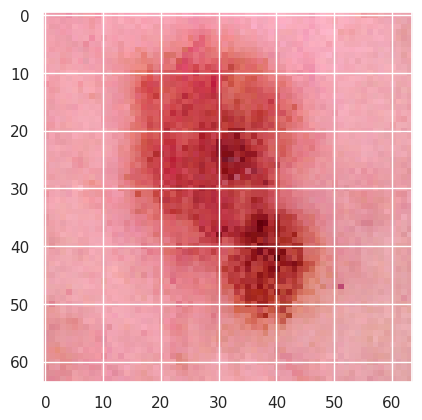

In [15]:
#example 3
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1261.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


In [16]:
# #save file as h5 model
# from keras.models import model_from_json
# xception_json = model.to_json()
# with open("model2.json", "w") as json_file:
#     json_file.write(xception_json)
# # serialize weights to HDF5
# model.save("model_skin2.h5") 
# converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
# tflite_model = converter.convert()

# # Save the model.
# with open('model_skin.tflite', 'wb') as f:
#   f.write(tflite_model)